# 1. Imports and Setup

In [12]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings('ignore')

# Import our complex diffusion model
from diffusion_model import (
    DiffusionUNet, 
    DiffusionScheduler, 
    MatrixDataset, 
    generate_staggered_adoption_data,
    train_diffusion_model,
    sample_from_diffusion
)

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

Using device: cpu


# 2. Generate Training Data

Generating large staggered adoption training dataset...
Generated 500 training samples
Matrix sizes in dataset: [(8, 8), (8, 9), (8, 10), (8, 11), (9, 8), (9, 9), (9, 10), (9, 11), (10, 8), (10, 9), (10, 10), (10, 11), (11, 8), (11, 9), (11, 10), (11, 11)]
Number of unique sizes: 16


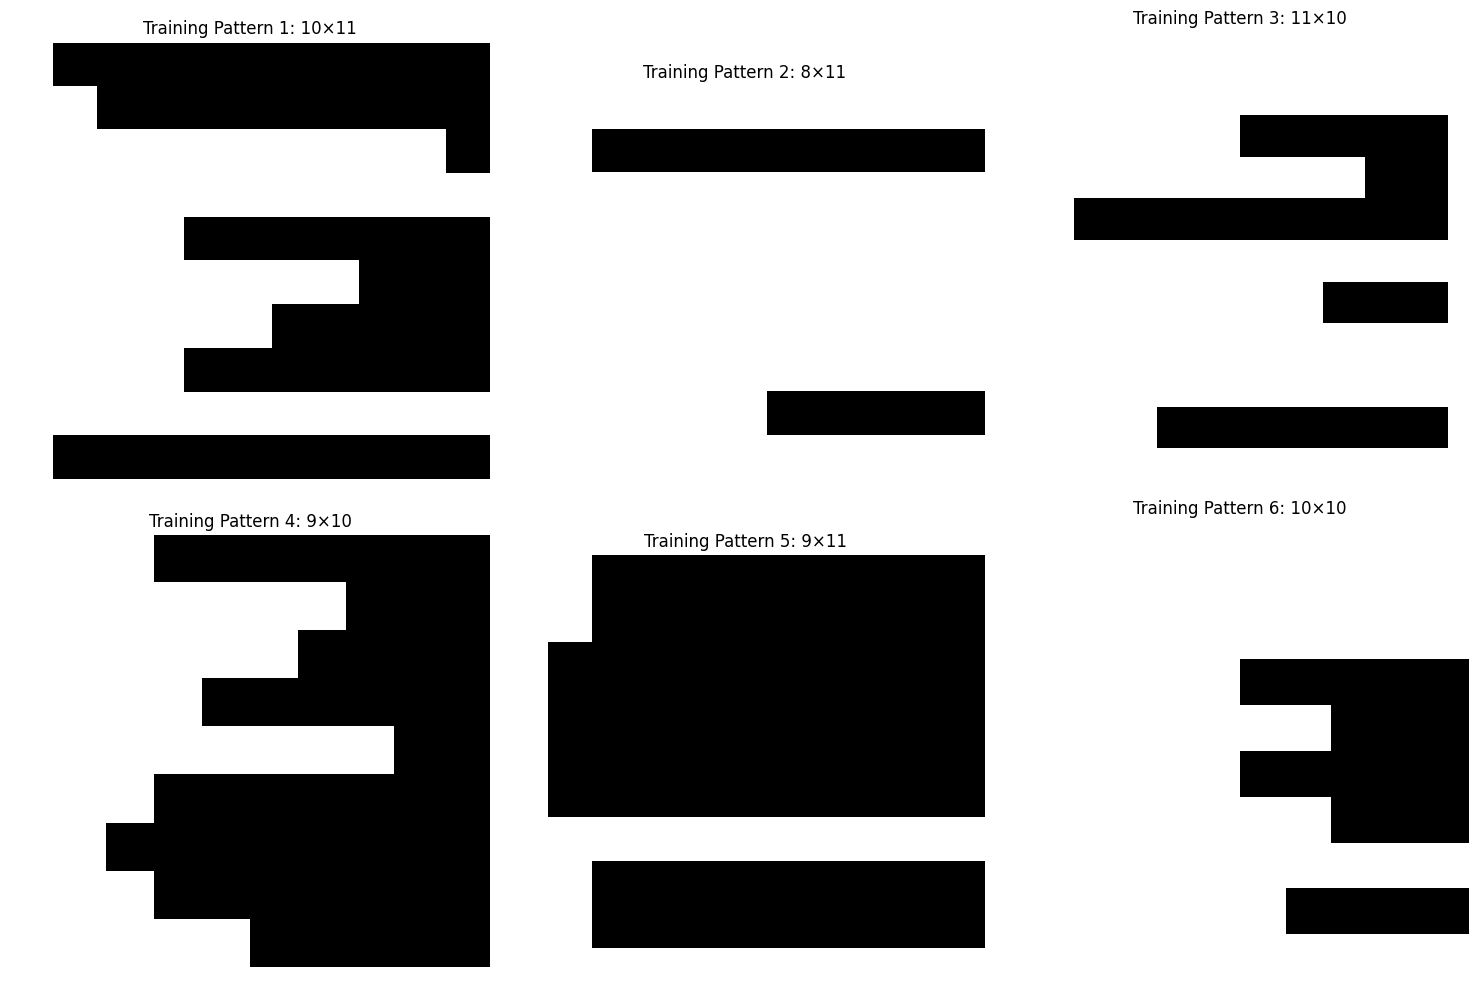

Unique mask values: [0. 1.]
Mask is binary: True
Max rows: 11, Max cols: 11
✓ All matrices fit within 32x32


In [2]:
# Generate large training data with varied staggered adoption patterns
print("Generating large staggered adoption training dataset...")
data_matrices, masking_matrices = generate_staggered_adoption_data(
    num_samples=500,  # Large dataset for complex model
    size_range=(8, 12),  # Varied sizes
    random_seed=42
)

print(f"Generated {len(data_matrices)} training samples")

# Show variety in matrix sizes
sizes = [(m.shape[0], m.shape[1]) for m in data_matrices]
unique_sizes = set(sizes)
print(f"Matrix sizes in dataset: {sorted(unique_sizes)}")
print(f"Number of unique sizes: {len(unique_sizes)}")

# Visualize a few examples of different staggered adoption patterns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i in range(6):
    row = i // 3
    col = i % 3
    
    mask = masking_matrices[i]
    axes[row, col].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[row, col].set_title(f'Training Pattern {i+1}: {mask.shape[0]}×{mask.shape[1]}')
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Unit')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Check that masks are truly binary
mask_values = np.unique(masking_matrices[0])
print(f"Unique mask values: {mask_values}")
print(f"Mask is binary: {set(mask_values) <= {0, 1}}")

# Verify all matrices fit within our max_size
max_rows = max(m.shape[0] for m in data_matrices)
max_cols = max(m.shape[1] for m in data_matrices)
print(f"Max rows: {max_rows}, Max cols: {max_cols}")
print("✓ All matrices fit within 32x32")

# 3. Train the Model

In [3]:
# Train the complex diffusion model on large staggered adoption dataset
print("Training complex diffusion model on large staggered adoption dataset...")
model = train_diffusion_model(
    data_matrices=data_matrices,
    masking_matrices=masking_matrices,
    num_epochs=100,  # More epochs for complex model
    batch_size=16,  # Larger batch size for complex model
    max_size=32,
    device=device,
    learning_rate=5e-4,  # Lower learning rate for complex model
    save_path='complex_staggered_adoption_model.pth'
)

print("Training completed!")

Training complex diffusion model on large staggered adoption dataset...
Training complex diffusion model on 500 samples


Epoch 10/100: 100%|██████████| 32/32 [00:07<00:00,  4.19it/s]


Epoch 10/100: Loss = 0.393426, LR = 0.000500


Epoch 20/100: 100%|██████████| 32/32 [00:07<00:00,  4.09it/s]


Epoch 20/100: Loss = 0.375444, LR = 0.000400


Epoch 30/100: 100%|██████████| 32/32 [00:07<00:00,  4.03it/s]


Epoch 30/100: Loss = 0.363888, LR = 0.000400


Epoch 40/100: 100%|██████████| 32/32 [00:07<00:00,  4.07it/s]


Epoch 40/100: Loss = 0.361896, LR = 0.000320


Epoch 50/100: 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]


Epoch 50/100: Loss = 0.355441, LR = 0.000320


Epoch 60/100: 100%|██████████| 32/32 [00:07<00:00,  4.02it/s]


Epoch 60/100: Loss = 0.355912, LR = 0.000256


Epoch 70/100: 100%|██████████| 32/32 [00:08<00:00,  4.00it/s]


Epoch 70/100: Loss = 0.354767, LR = 0.000256


Epoch 80/100: 100%|██████████| 32/32 [00:08<00:00,  3.75it/s]


Epoch 80/100: Loss = 0.350809, LR = 0.000205


Epoch 90/100: 100%|██████████| 32/32 [00:07<00:00,  4.12it/s]


Epoch 90/100: Loss = 0.350846, LR = 0.000205


Epoch 100/100: 100%|██████████| 32/32 [00:08<00:00,  3.84it/s]

Epoch 100/100: Loss = 0.351079, LR = 0.000164
Training completed! Best loss: 0.346951
Model saved to complex_staggered_adoption_model.pth
Training completed!


# 4. Generate Samples

In [ ]:
# Initialize scheduler
scheduler = DiffusionScheduler(num_timesteps=20)

# Generate samples to test if the complex model learned the staggered adoption pattern
print("Generating samples to test memorization with complex model...")

# Generate multiple samples with different sizes
samples = []
sample_sizes = [(8, 10), (10, 8), (9, 9), (12, 8), (8, 12), (10, 10)]

for i, (rows, cols) in enumerate(sample_sizes):
    size_info = torch.tensor([[rows, cols]], dtype=torch.float32, device=device)
    sample = sample_from_diffusion(model, scheduler, size_info, num_steps=15, device=device, threshold=0.5)
    samples.append(sample[0])

print("Sample generation completed!")

Generating samples to test memorization with complex model...


RuntimeError: Expected 3D (unbatched) or 4D (batched) input to conv2d, but got input of size: [1, 1, 64, 32, 32]

# 5. Visualize Results

IndexError: list index out of range

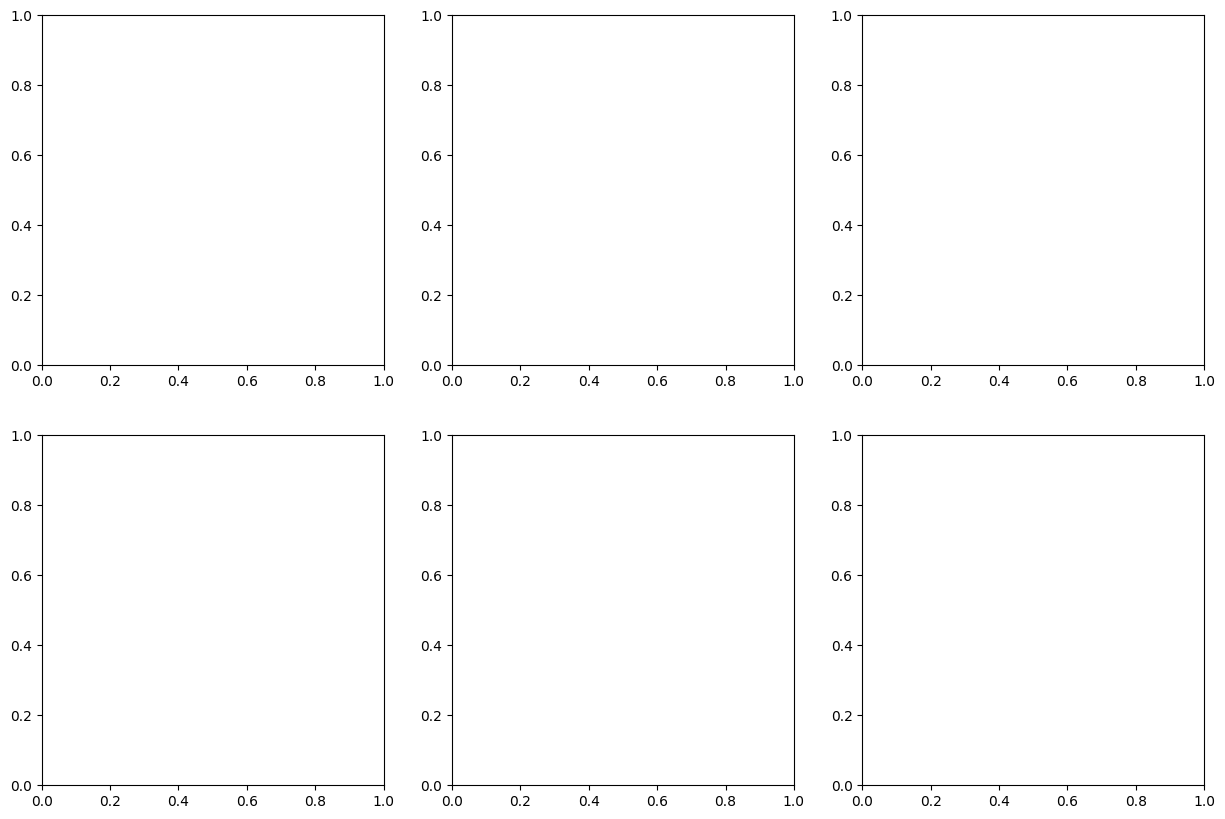

In [6]:
# Visualize the generated samples to see if the complex model learned the pattern
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sample_sizes = [(8, 10), (10, 8), (9, 9), (12, 8), (8, 12), (10, 10)]

for i in range(6):
    row = i // 3
    col = i % 3
    
    # Show the generated mask
    mask = samples[i][1].cpu().numpy()  # Second channel is the mask
    rows, cols = sample_sizes[i]
    
    axes[row, col].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[row, col].set_title(f'Complex Model Generated {rows}×{cols}')
    axes[row, col].set_xlabel('Time')
    axes[row, col].set_ylabel('Unit')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

# Enhanced analysis of the patterns for staggered adoption characteristics
print("Enhanced analysis of complex model generated patterns...")

for i, sample in enumerate(samples):
    mask = sample[1].cpu().numpy()
    rows, cols = sample_sizes[i]
    
    # Check if each row has a clear "cutoff" point (staggered adoption)
    staggered_scores = []
    cutoff_points = []
    
    for row in range(mask.shape[0]):
        # Find the first 0 in each row (if any)
        zeros = np.where(mask[row] == 0)[0]
        if len(zeros) > 0:
            first_zero = zeros[0]
            # Check if all values after first_zero are 0 (clean cutoff)
            if np.all(mask[row, first_zero:] == 0):
                staggered_scores.append(1)
                cutoff_points.append(first_zero)
            else:
                staggered_scores.append(0)
                cutoff_points.append(None)
        else:
            staggered_scores.append(1)  # No missing data is also valid
            cutoff_points.append(None)
    
    avg_staggered_score = np.mean(staggered_scores)
    valid_cutoffs = [c for c in cutoff_points if c is not None]
    
    print(f"Sample {i+1} ({rows}×{cols}):")
    print(f"  - Staggered adoption score: {avg_staggered_score:.3f}")
    print(f"  - Rows with clean cutoffs: {sum(staggered_scores)}/{rows}")
    if valid_cutoffs:
        print(f"  - Cutoff points: {valid_cutoffs}")
        print(f"  - Cutoff variation: {max(valid_cutoffs) - min(valid_cutoffs) if len(valid_cutoffs) > 1 else 0}")

print("\nComplex model results:")
print("- Higher scores indicate better staggered adoption pattern learning")
print("- Look for clean horizontal cutoffs in each row")
print("- Varied cutoff points suggest proper staggered adoption")

Comparing complex model generated patterns with training patterns...


IndexError: list index out of range

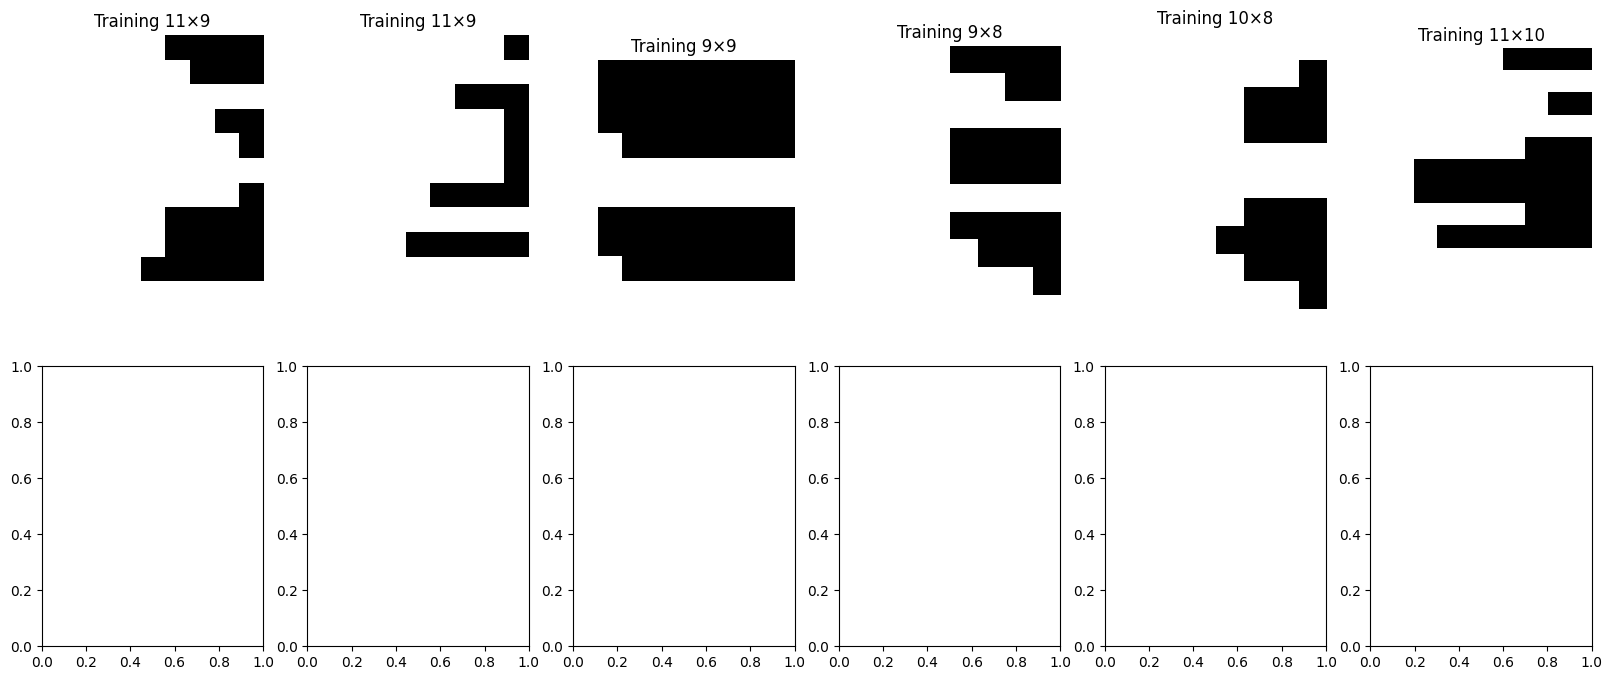

In [9]:
# Compare complex model generated patterns with training patterns
print("Comparing complex model generated patterns with training patterns...")

# Select some training patterns for comparison
training_indices = np.random.choice(len(masking_matrices), 6, replace=False)
training_samples = [masking_matrices[i] for i in training_indices]

# Visualize comparison
fig, axes = plt.subplots(2, 6, figsize=(20, 8))

# Training samples (top row)
for i in range(6):
    mask = training_samples[i]
    rows, cols = mask.shape
    axes[0, i].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[0, i].set_title(f'Training {rows}×{cols}')
    axes[0, i].axis('off')

# Generated samples (bottom row)
for i in range(6):
    mask = samples[i][1].cpu().numpy()
    rows, cols = sample_sizes[i]
    axes[1, i].imshow(mask, cmap='gray', vmin=0, vmax=1)
    axes[1, i].set_title(f'Complex Generated {rows}×{cols}')
    axes[1, i].axis('off')

plt.tight_layout()
plt.show()

print("Comparison complete!")
print("Top row: Training patterns")
print("Bottom row: Complex model generated patterns")
print("\nLook for similarities in the staggered adoption patterns!")
print("The complex model should show much better pattern learning.")

In [7]:
# Analyze the model complexity
print("Model complexity analysis:")
model = MinimalDiffusionModel(max_size=32)
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"Total parameters: {total_params:,}")
print(f"Trainable parameters: {trainable_params:,}")

# Show model architecture
print("\nModel architecture:")
print(model)

print("\nComplex model improvements:")
print("1. More layers: 4 conv blocks vs 3 simple convs")
print("2. Residual connections: Help with gradient flow")
print("3. Multi-scale processing: Downsampling + upsampling")
print("4. Batch normalization: Stabilizes training")
print("5. More channels: 64-128 vs 16 channels")
print("6. Time and size embeddings: Better conditioning")
print("7. Learning rate scheduling: Adaptive learning rate")

Model complexity analysis:


NameError: name 'MinimalDiffusionModel' is not defined